### 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, random_state=1)

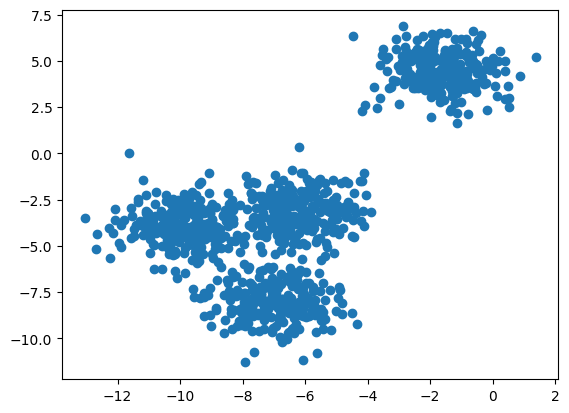

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X_train)

KMeans(n_clusters=4)

In [7]:
y_labels = km.predict(X_test)

In [ ]:
len(km.labels_)

700

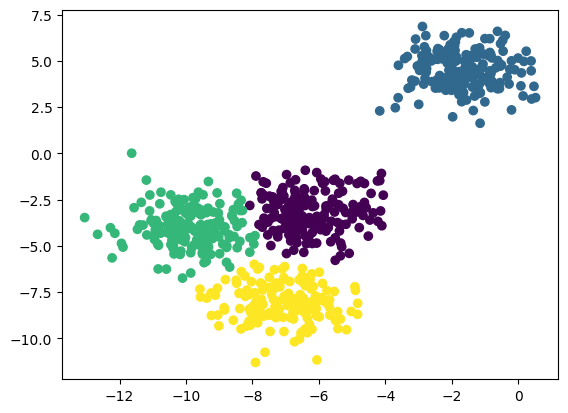

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=km.labels_)

###  22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [37]:
iris = load_iris()
X = iris.data
y = iris.target

In [38]:
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

In [39]:
print(labels[:10])

[1 1 1 1 1 1 1 1 1 1]


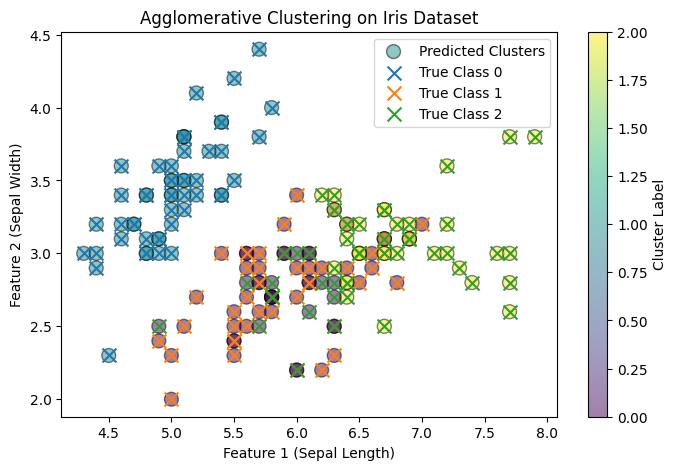

In [40]:
plt.figure(figsize=(8,5))

# Create a scatter plot for the predicted clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.5, label='Predicted Clusters')

# Overlay the true labels with different markers
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], edgecolor='k', s=100, marker='x', label=f'True Class {i}')

plt.title('Agglomerative Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.show()


### 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import  make_moons
from sklearn.cluster import  DBSCAN

In [2]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=1)

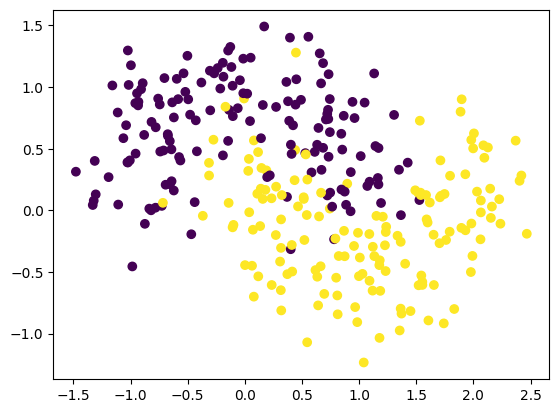

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
dbsan = DBSCAN(eps=0.2, min_samples=5)
labels = dbsan.fit_predict(X)

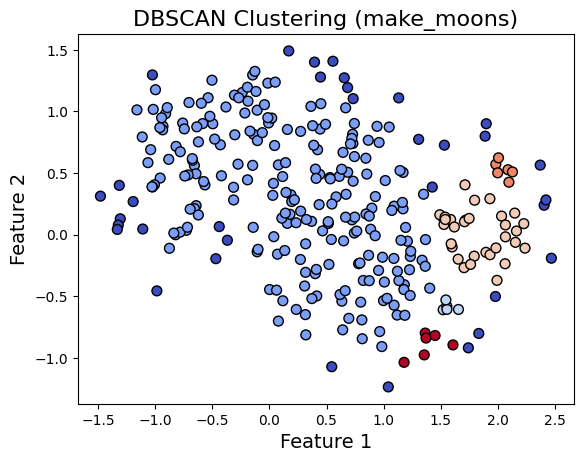

In [13]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='coolwarm', edgecolors='k', s=50)
plt.title("DBSCAN Clustering (make_moons)", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)


plt.show()

### 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [27]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [28]:
wine = load_wine()
X = wine.data

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [33]:
km = KMeans(n_clusters=3, random_state=1)
labels = km.fit_predict(X)

In [34]:
print("Cluster sizes:", np.bincount(labels))

Cluster sizes: [66 51 61]


In [44]:
km.cluster_centers_

array([[-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

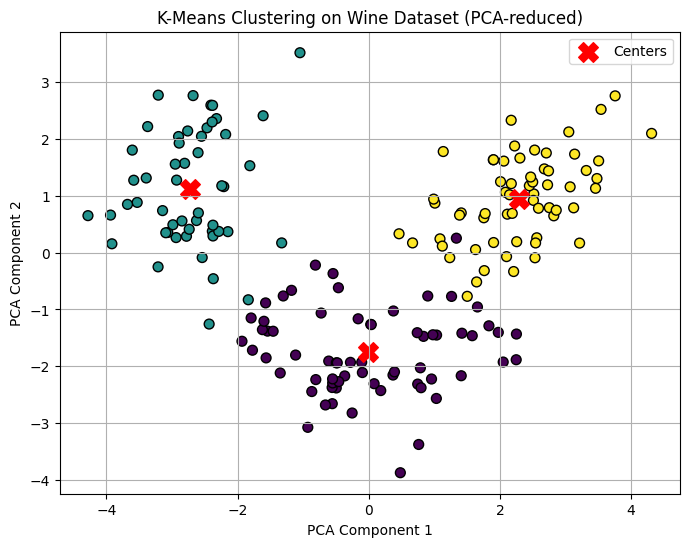

In [48]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50, edgecolors='k')

# Plot cluster centers
centers_pca = pca.transform(km.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Centers')

plt.title('K-Means Clustering on Wine Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

### 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

In [57]:
X, y = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1)
X_scaled = StandardScaler().fit_transform(X)

In [58]:
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)

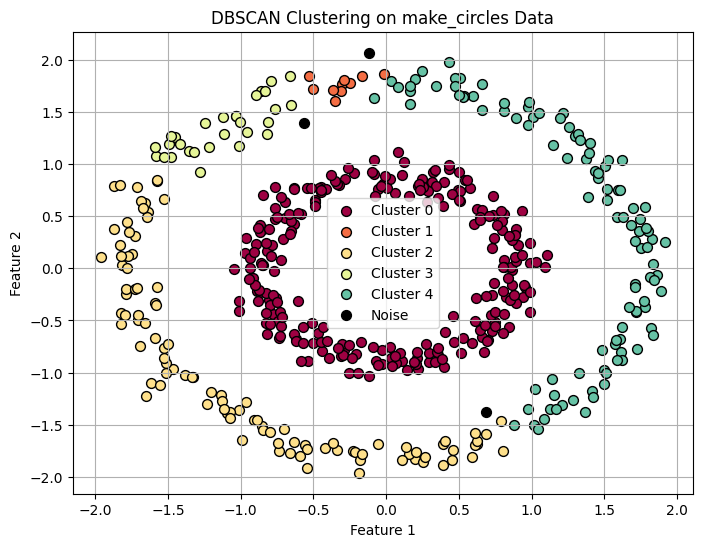

In [66]:
# Plot the clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise
        color = [0, 0, 0, 1]
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"
    plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1], 
                c=[color], label=label_name, edgecolors='k', s=50)

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [67]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

In [68]:
data = load_breast_cancer()
X = data.data

In [69]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [71]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids (scaled):")
print(centroids)

Cluster Centroids (scaled):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


### 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [73]:

X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.1, 0.5, 1.0], random_state=42)

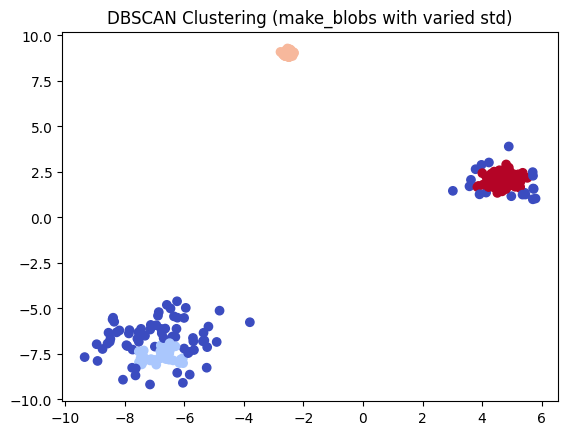

In [74]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("DBSCAN Clustering (make_blobs with varied std)")
plt.show()

### 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [83]:
digits = load_digits()
X = digits.data
y = digits.target

In [84]:
X_scaled = StandardScaler().fit_transform(X)

In [85]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [86]:
km = KMeans(n_clusters=10, random_state=1)
labels = km.fit_predict(X_pca)

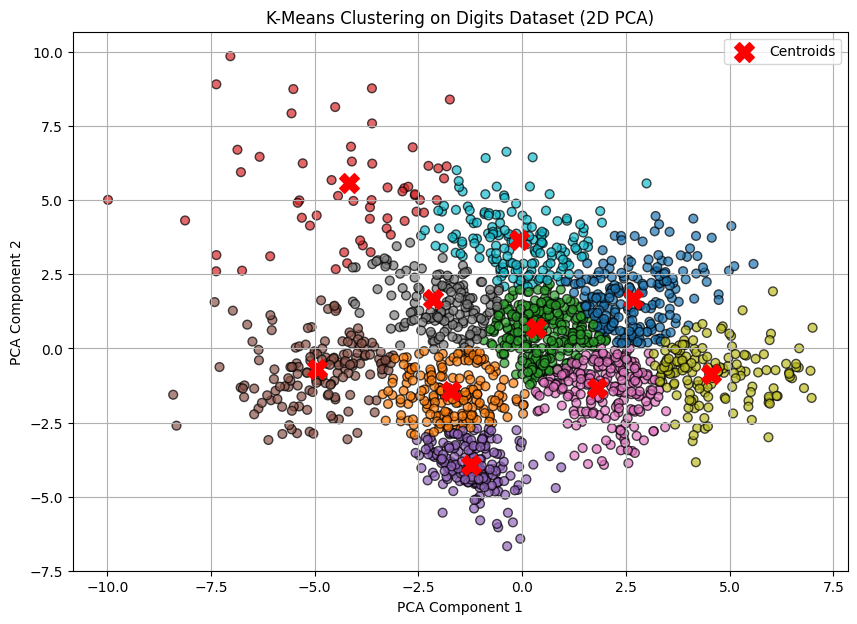

In [87]:
# Step 5: Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k', alpha=0.7)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering on Digits Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

### 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [96]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

In [104]:
silhouette_coeff = []
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coeff.append(score)

In [105]:
silhouette_coeff

[0.5482461978633253,
 0.7569108532473462,
 0.7915830011443039,
 0.6918772669323956]

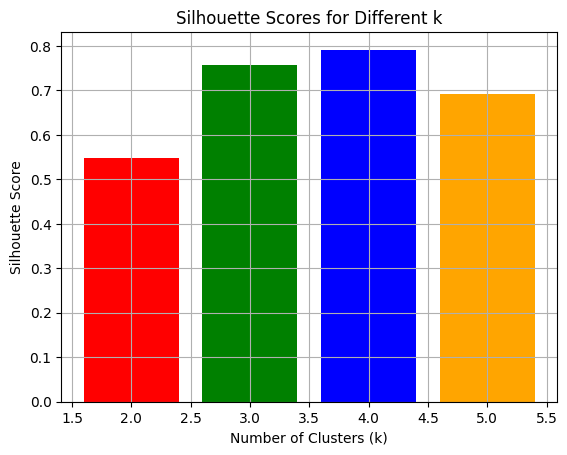

In [114]:
bar_colors = ['red', 'green', 'blue', 'orange']
plt.bar(k_values, silhouette_coeff, color=bar_colors)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.grid()
plt.show()

### 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [116]:
iris = load_iris()
X = iris.data

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

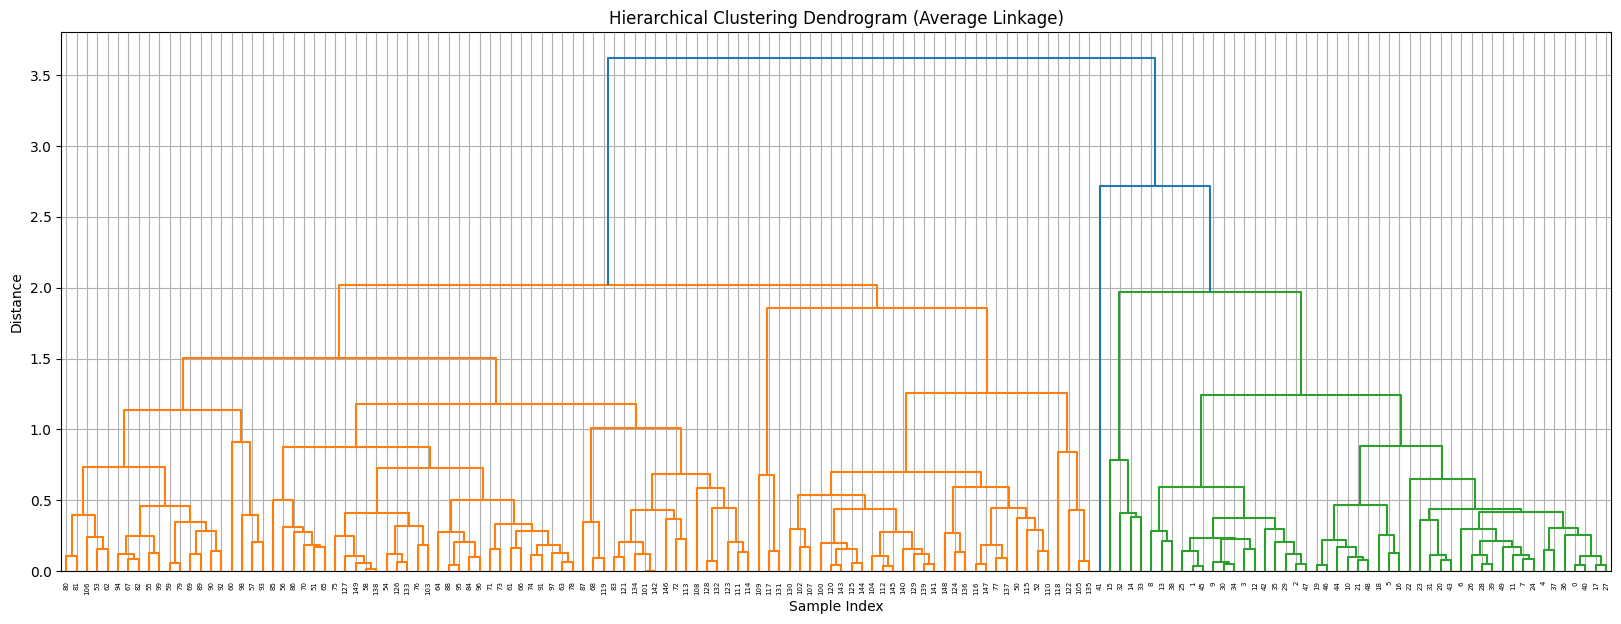

In [ ]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20, 7))
plt.title('Dendogram')

sc.dendrogram(sc.linkage(X_pca, method='average'))

plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


### 31. Generate synthetic data with overlapping clusters using make_blobs, apply K-Means, and visualize with decision boundaries.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [23]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=1)

In [24]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1)

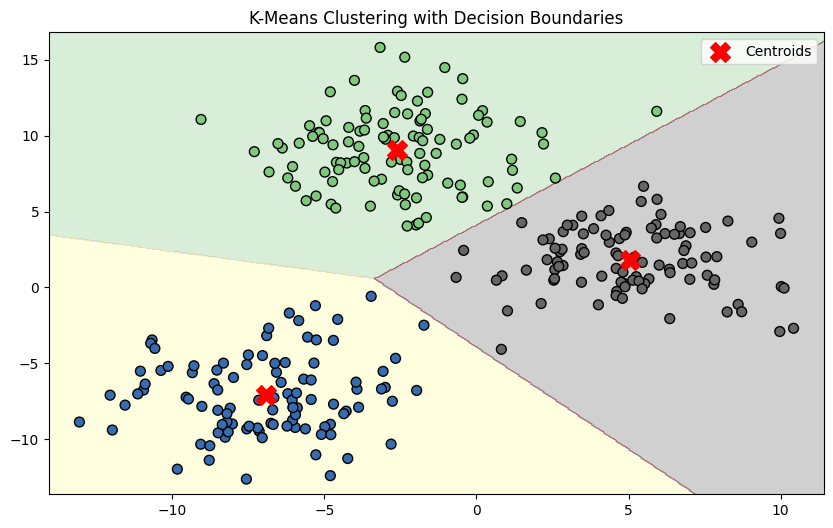

In [31]:
plt.figure(figsize=(10,6))
# Create a mesh grid to show decision boundaries
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict the cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')

# Plot the data points and centroids
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, edgecolors='k', s=50, cmap='Accent')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.show()


### 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [33]:
digits = load_digits()
X = digits.data

In [34]:
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

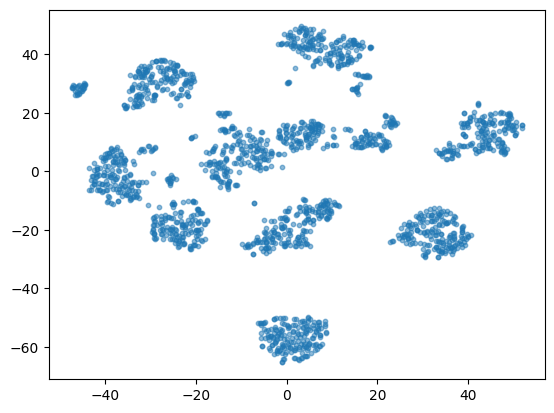

In [43]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],s=10, alpha=0.5)

In [35]:
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_embedded)

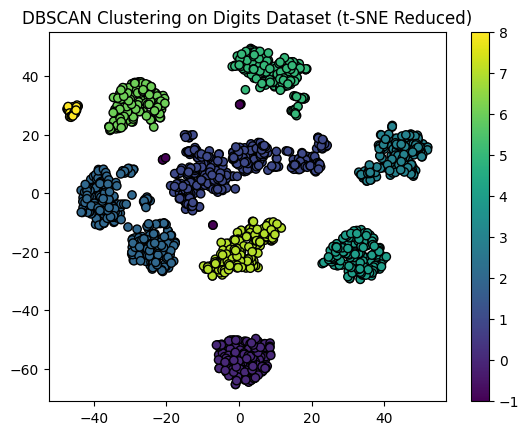

In [36]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.colorbar()
plt.show()

### 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [45]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

In [46]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglo.fit_predict(X)

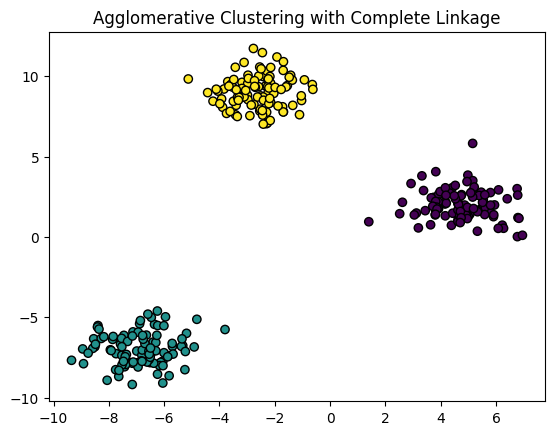

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()

### 34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

In [49]:
data = load_breast_cancer()
X = data.data

In [ ]:
inertia_values = [] # wcss is same as inertia
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
inertia_values

[77943099.87829882,
 47264841.91676835,
 29226541.651979797,
 20539877.62210288,
 16573867.01920941]

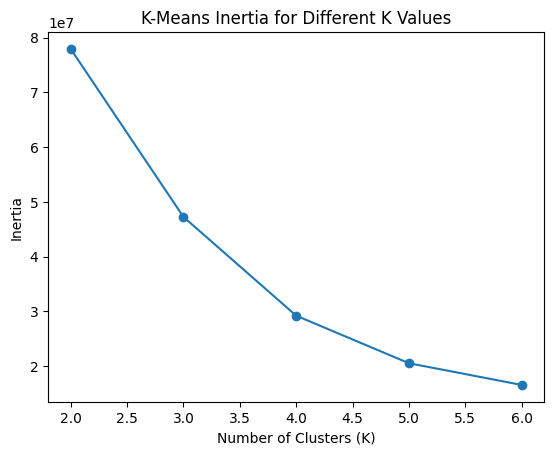

In [51]:
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means Inertia for Different K Values')
plt.show()

### 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

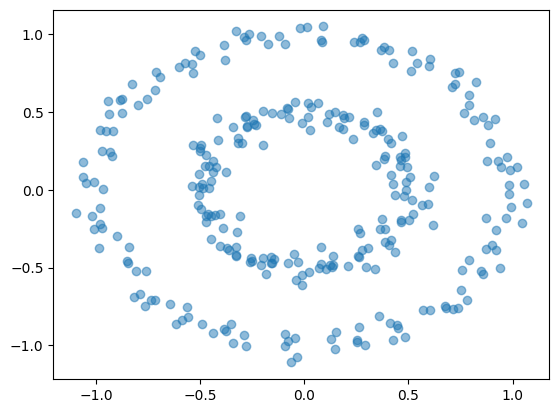

In [55]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
plt.scatter(X[:,0], X[:,1], alpha=0.5)

In [56]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

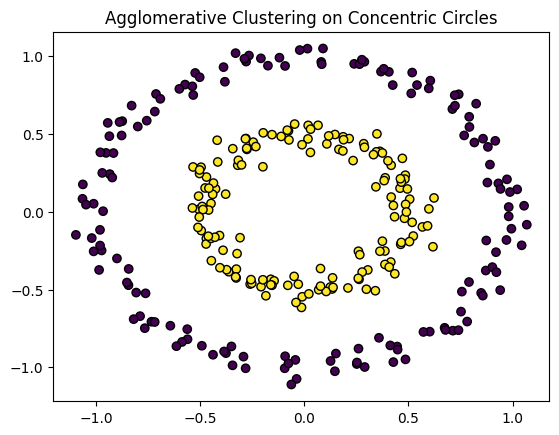

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("Agglomerative Clustering on Concentric Circles")
plt.show()

### 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [59]:
data = load_wine()
X = data.data

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [62]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found (excluding noise): {num_clusters}")

Number of clusters found (excluding noise): 0


### 37. Generate synthetic data with make_blobs and apply K-Means. Then plot the cluster centers on top of the data points.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [66]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

In [67]:
kmean = KMeans(n_clusters=3, random_state=1, n_init=10)
labels = kmean.fit_predict(X)

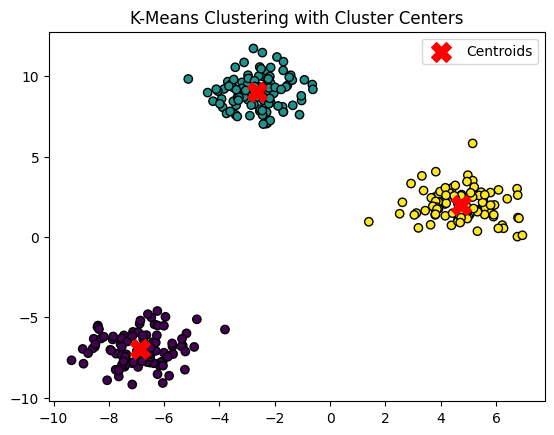

In [68]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Cluster Centers")
plt.legend()
plt.show()

### 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [70]:
data = load_iris()
X = data.data

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [73]:
num_noise = sum(labels == -1)
print(f"Number of noise samples: {num_noise}")

Number of noise samples: 34


### 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

In [75]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [76]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

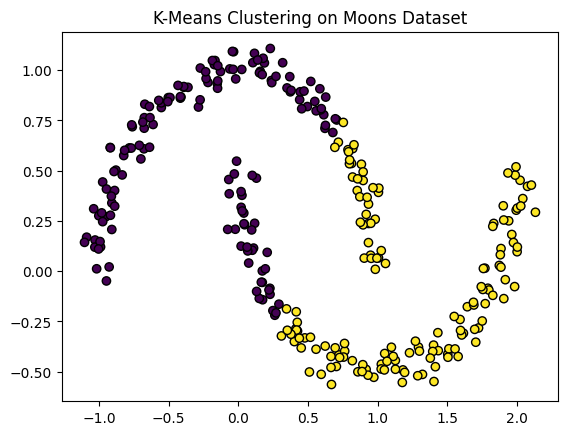

In [77]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on Moons Dataset")
plt.show()

### 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use K-Means and visualize with a 3D scatter plot.

In [79]:
import numpy as np
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [80]:
digits = load_digits()
X = digits.data


In [81]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [82]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

In [83]:
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=labels.astype(str),
    title="K-Means Clustering on Digits Dataset (3D PCA)",
    labels={'x': 'PCA 1', 'y': 'PCA 2', 'z': 'PCA 3'},
    color_discrete_sequence=px.colors.qualitative.T10
)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

### Q41: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

In [85]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [86]:
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

In [87]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [88]:
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.6786441315351273


### Q42: Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [90]:
data = load_breast_cancer()
X = data.data

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [92]:
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X_pca)

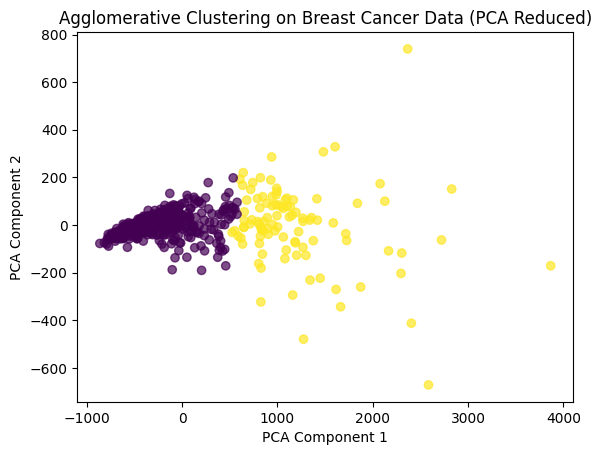

In [93]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering on Breast Cancer Data (PCA Reduced)")
plt.show()

### Q43: Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

In [95]:
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

In [96]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

In [97]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

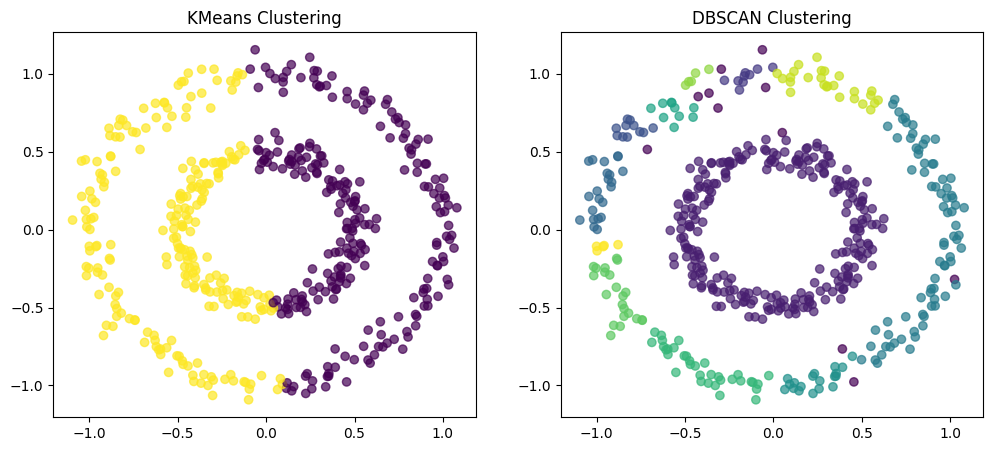

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
ax[0].set_title("KMeans Clustering")

ax[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
ax[1].set_title("DBSCAN Clustering")

plt.show()

### Q44: Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [100]:
iris = load_iris()
X = iris.data

In [101]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [102]:
silhouette_vals = silhouette_samples(X, labels)

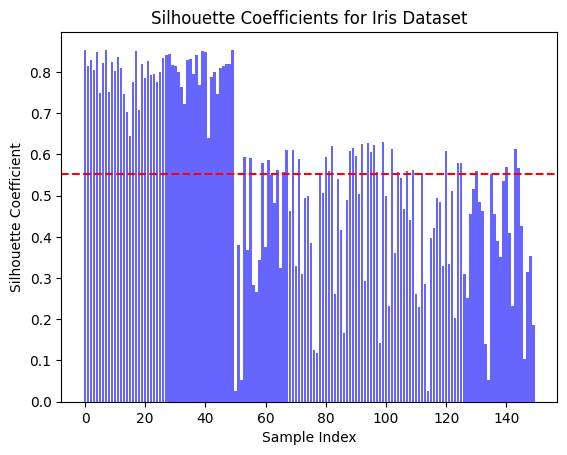

In [103]:
plt.bar(range(len(X)), silhouette_vals, color='blue', alpha=0.6)
plt.axhline(y=silhouette_score(X, labels), color='red', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficients for Iris Dataset")
plt.show()

### Q45: Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

In [105]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [106]:
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)


In [107]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

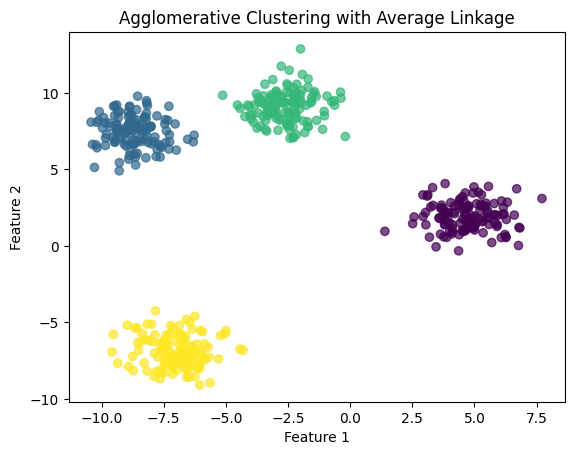

In [108]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()

### Q46: Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

In [109]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

In [110]:
wine = load_wine()
X = wine.data[:, :4]  # First 4 features
df = pd.DataFrame(X, columns=wine.feature_names[:4])

In [111]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [114]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,Cluster
0,14.23,1.71,2.43,15.6,1
1,13.20,1.78,2.14,11.2,1
2,13.16,2.36,2.67,18.6,0
3,14.37,1.95,2.50,16.8,1
4,13.24,2.59,2.87,21.0,0
...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,0
174,13.40,3.91,2.48,23.0,2
175,13.27,4.28,2.26,20.0,0
176,13.17,2.59,2.37,20.0,0


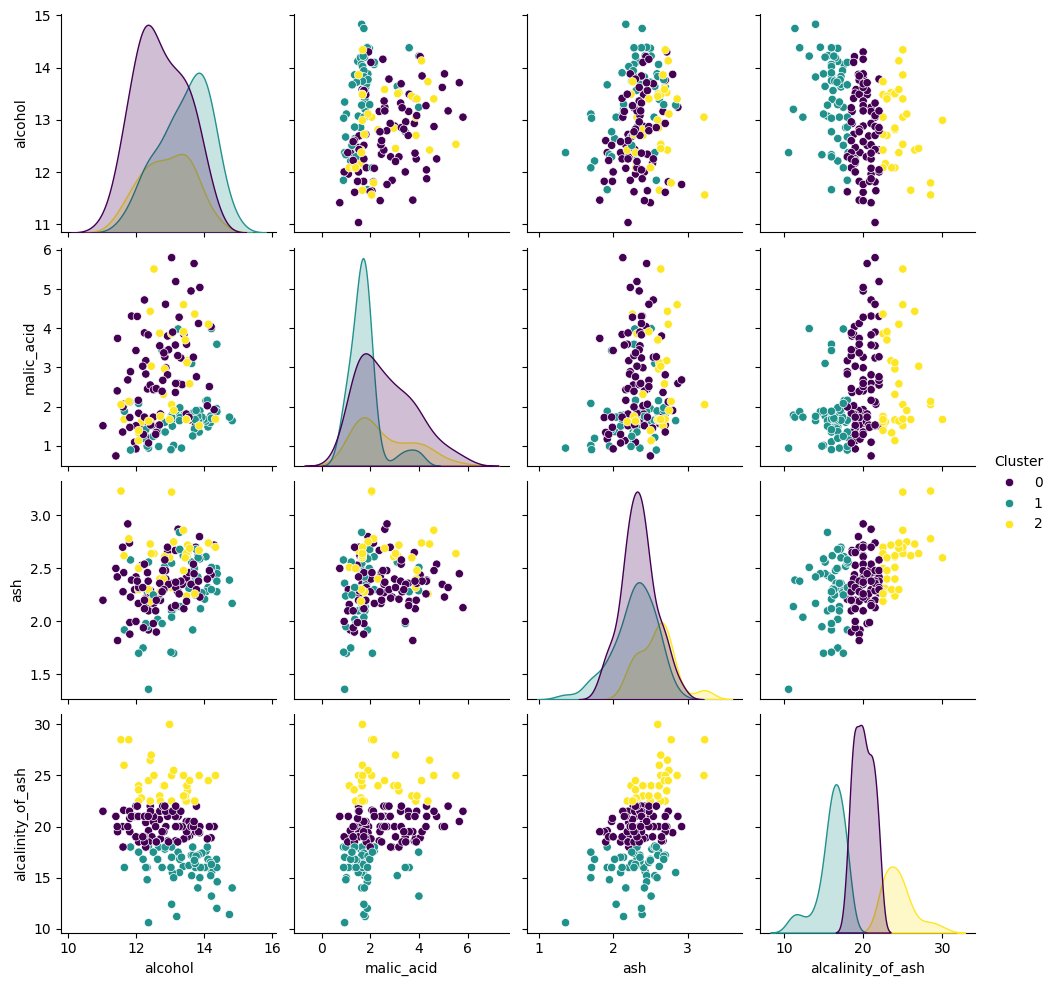

In [112]:
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()

### Q47: Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

In [115]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [116]:
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

In [118]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 4
Number of noise points: 49


### Q48: Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

In [119]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

In [120]:
digits = load_digits()
X = digits.data

In [121]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

In [122]:
agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

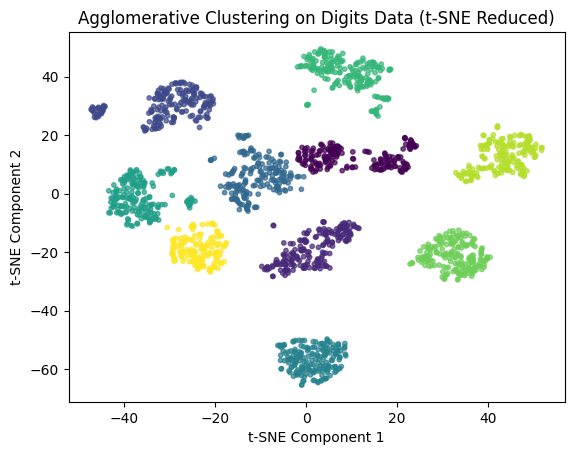

In [125]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7,s=10)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Agglomerative Clustering on Digits Data (t-SNE Reduced)")
plt.show()